In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.core.describe import DataFrameDescriber

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Data Exploration

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('./drive/Shareddrives/DATA MINING 240/Dataset_Depression/student.csv')

In [4]:
# Set max_rows option to None to display all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,Satisfied with living conditions,Living with a partner/child,Parental home,Having only one parent,At least one parent unemployed,Siblings,Long commute,Mode of transportation,Financial difficulties,Grant,Additional income,Public health insurance,Private health insurance,C.M.U.,Irregular rhythm of meals,Unbalanced meals,Eating junk food,On a diet,Irregular rhythm or unbalanced meals,Physical activity(3 levels),Physical activity(2 levels),Weight (kg),Height (cm),Overweight and obesity,Systolic blood pressure (mmHg),Diastolic blood pressure (mmHg),Prehypertension or hypertension,Heart rate (bpm),Abnormal heart rate,Distant visual acuity of right eye (score /10),Distant visual acuity of left eye (score /10),Close visual acuity of right eye (score /10),Close visual acuity of left eye (score /10),Decreased in distant visual acuity,Decreased in close visual acuity,Urinalysis (glycosuria),Urinalysis (proteinuria),Urinalysis (hematuria),Urinalysis leukocyturia),Urinalysis (positive nitrite test),Abnormal urinalysis,Vaccination up to date,Control examination needed,Anxiety symptoms,Panic attack symptoms,Depressive symptoms,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Binge drinking,Marijuana use,Other recreational drugs
0,20 and more,female,yes,humanities,second,no,no,yes,yes,yes,no,no,no,no,yes,no,on foot,no,yes,no,yes,no,no,yes,no,yes,no,yes,regularly,regularly,62.0,165.0,no,NaN,6.0,NaN,75.0,no,10,10,10,10,no,no,no,no,no,yes,no,yes,NaN,yes,no,no,no,no,no,no,no or occasionally,no,no,no
1,19,female,yes,humanities,second,no,no,yes,yes,yes,no,yes,no,no,no,yes,by public transportation,no,yes,no,yes,yes,no,no,no,yes,no,no,regularly,regularly,57.0,170.0,no,10.0,5.0,no,65.0,no,10,10,10,10,no,no,no,no,yes,yes,no,yes,NaN,no,no,no,no,regularly,occasionally to regularly,occasionally,no or occasionally,no,no,no
2,20 and more,female,yes,humanities,second,no,no,yes,yes,yes,no,no,yes,no,yes,no,by car,no,yes,yes,yes,yes,no,yes,no,yes,no,yes,no,no activity or occasionally,NaN,162.0,NaN,11.0,7.0,no,65.0,no,10,10,10,10,no,no,no,no,no,no,no,no,NaN,no,no,no,yes,no,no,occasionally,no or occasionally,no,no,no
3,19,female,yes,humanities,second,no,no,yes,yes,yes,no,no,no,no,no,no,on foot,no,yes,no,yes,yes,no,no,no,yes,no,no,no,no activity or occasionally,85.0,193.0,no,11.0,8.0,no,70.0,no,10,10,10,10,no,no,no,no,no,yes,no,yes,NaN,no,no,no,no,no,no,occasionally,no or occasionally,no,no,no
4,18,female,yes,humanities,second,no,no,yes,yes,yes,no,no,no,no,yes,no,on foot,no,yes,no,yes,yes,no,no,no,yes,no,no,no,no activity or occasionally,41.0,161.0,no,10.0,6.0,no,NaN,NaN,10,10,10,10,no,no,no,no,yes,no,no,yes,yes,no,no,no,no,no,no,no,no or occasionally,no,no,no


In [6]:
# rows and columns in data
print("Total Rows: %s and Columns: %s" %(df.shape[0], df.shape[1]))

Total Rows: 4184 and Columns: 62


In [7]:
# checking data types of recorded data
df.dtypes

Age (4 levels)                                     object
Gender                                             object
French nationality                                 object
Field of study                                     object
Year of university                                 object
Learning disabilities                              object
Difficulty memorizing lessons                      object
Professional objective                             object
Informed about opportunities                       object
Satisfied with living conditions                   object
Living with a partner/child                        object
Parental home                                      object
Having only one parent                             object
At least one parent unemployed                     object
Siblings                                           object
Long commute                                       object
Mode of transportation                             object
Financial diff

In [8]:
print("---------------------------DATA--------------------------------\n")
print("Nan values in dataset are: %s"%len(df[df.isna().any(1)]))
print('-'*100)
# print('Total duplicated values in data are: %s'%(len(train_df)-len(train_df.drop_duplicates(keep='first'))))

---------------------------DATA--------------------------------

Nan values in dataset are: 3249
----------------------------------------------------------------------------------------------------


In [9]:
#Check remaining missing values if any 
def display_only_missing(df):
    all_data_na = (df.isnull().sum() / len(df)) * 100
    all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
    print(missing_data)

In [10]:
display_only_missing(df)

                                  Missing Ratio
Prehypertension or hypertension       36.663480
Other recreational drugs              30.425430
Systolic blood pressure (mmHg)        27.533461
Mode of transportation                26.768642
Diastolic blood pressure (mmHg)       25.645315
Vaccination up to date                25.597514
Long commute                          22.370937
Parental home                         17.065010
Cigarette smoker (5 levels)           14.818356
Cigarette smoker (3 levels)           14.818356
Marijuana use                         13.575526
Satisfied with living conditions      12.284895
Heart rate (bpm)                       9.225621
Abnormal heart rate                    9.225621
Weight (kg)                            4.541109
Overweight and obesity                 4.541109
Height (cm)                            4.469407
Having only one parent                 1.434034
Drinker (3 levels)                     0.191205
Drinker (2 levels)                     0

In [11]:
df.isnull().sum()

Age (4 levels)                                       0
Gender                                               0
French nationality                                   0
Field of study                                       0
Year of university                                   0
Learning disabilities                                0
Difficulty memorizing lessons                        0
Professional objective                               0
Informed about opportunities                         0
Satisfied with living conditions                   514
Living with a partner/child                          0
Parental home                                      714
Having only one parent                              60
At least one parent unemployed                       0
Siblings                                             0
Long commute                                       936
Mode of transportation                            1120
Financial difficulties                               0
Grant     

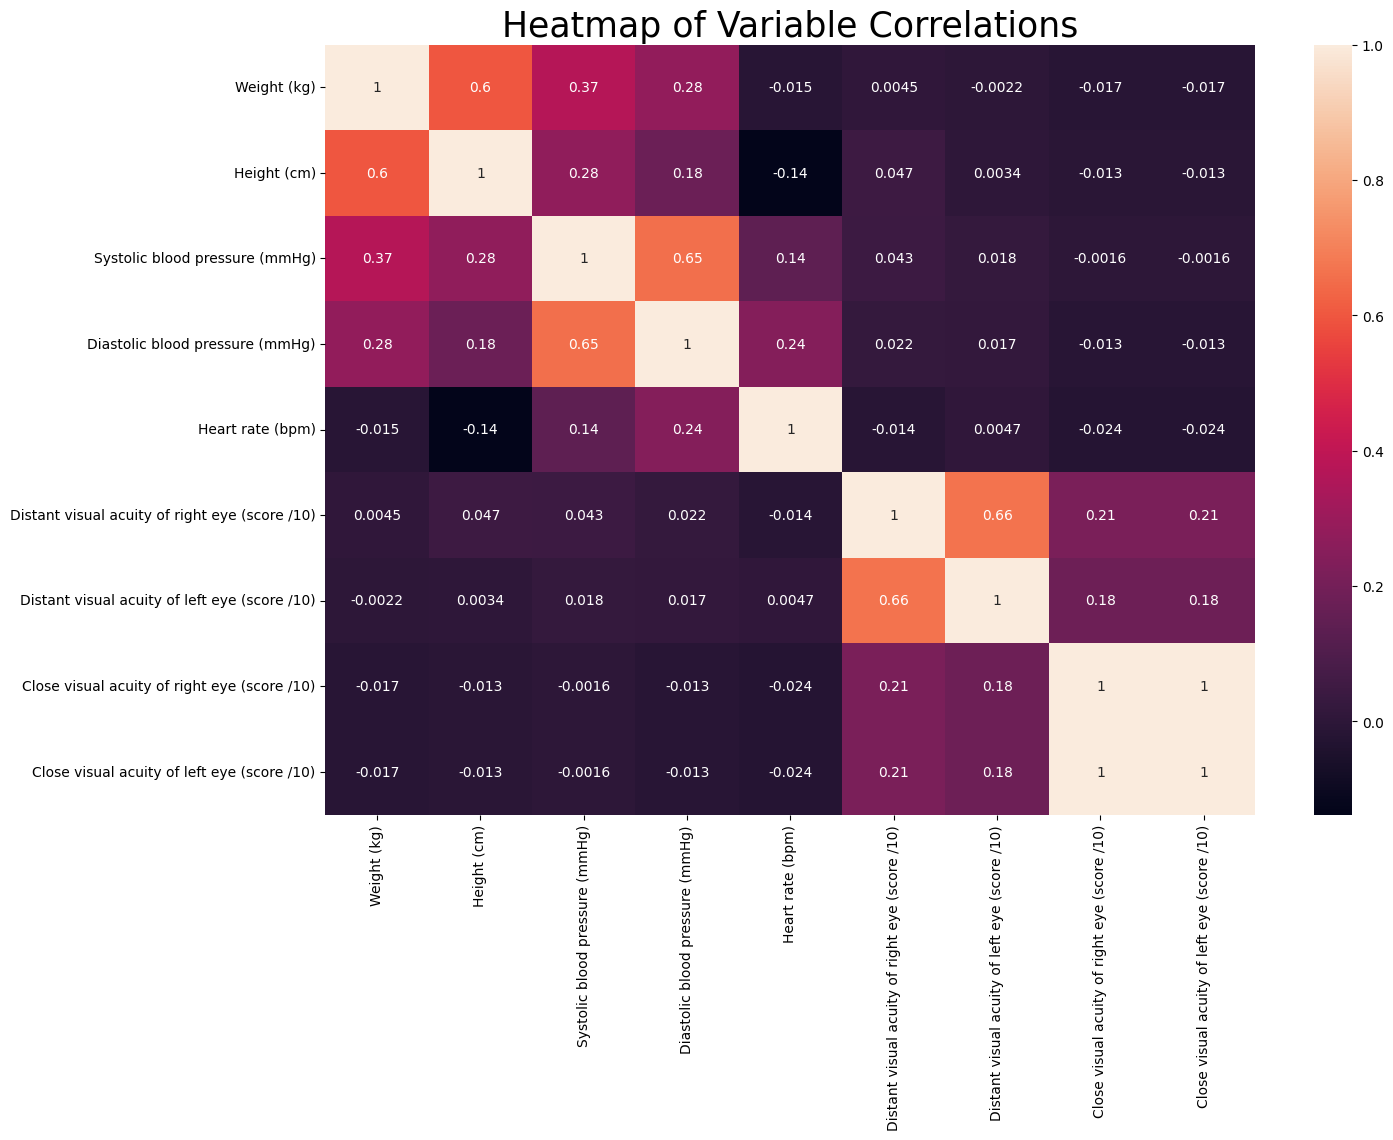

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of Variable Correlations',fontsize=25)
plt.show()


In [13]:
feat_columns = df.columns[df.notna().all()].tolist()
selected_features = df[feat_columns]

# select all parameters with missing data
missing_data_columns = df.columns[df.isna().any()].tolist()
missing_data = df[missing_data_columns]

In [14]:
missing_data.head()

,Satisfied with living conditions,Parental home,Having only one parent,Long commute,Mode of transportation,Private health insurance,Weight (kg),Height (cm),Overweight and obesity,Systolic blood pressure (mmHg),Diastolic blood pressure (mmHg),Prehypertension or hypertension,Heart rate (bpm),Abnormal heart rate,Vaccination up to date,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Marijuana use,Other recreational drugs
0,yes,no,no,no,on foot,no,62.0,165.0,no,NaN,6.0,NaN,75.0,no,NaN,no,no,no,no or occasionally,no,no
1,yes,yes,no,yes,by public transportation,yes,57.0,170.0,no,10.0,5.0,no,65.0,no,NaN,regularly,occasionally to regularly,occasionally,no or occasionally,no,no
2,yes,no,yes,no,by car,yes,NaN,162.0,NaN,11.0,7.0,no,65.0,no,NaN,no,no,occasionally,no or occasionally,no,no
3,yes,no,no,no,on foot,yes,85.0,193.0,no,11.0,8.0,no,70.0,no,NaN,no,no,occasionally,no or occasionally,no,no
4,yes,no,no,no,on foot,yes,41.0,161.0,no,10.0,6.0,no,NaN,NaN,yes,no,no,no,no or occasionally,no,no


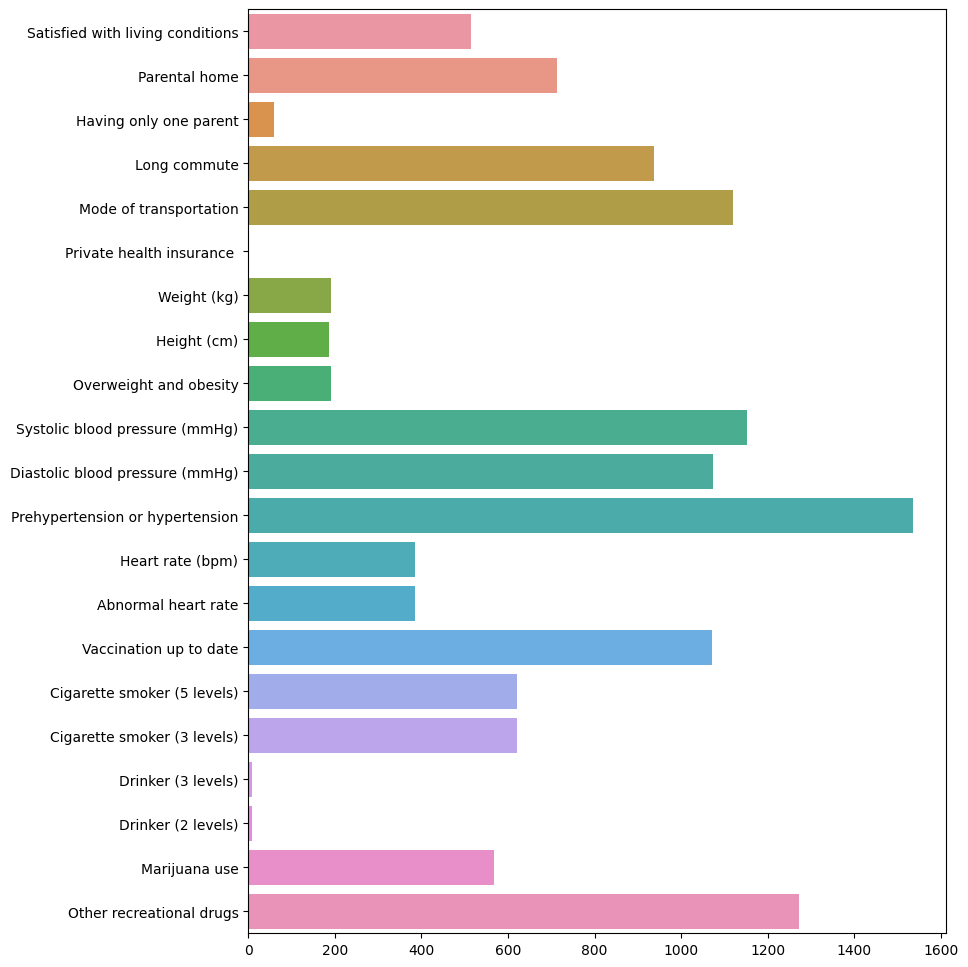

In [15]:
# visualizing nan data in all columns
output = missing_data.isnull().sum()
plt.figure(figsize=(9,12))
sns.barplot(x=output.values, y=output.keys())
plt.show()

## Encoding the columns

In [16]:
'''
Parameters with object values are filtered to replace their string
values with numeric equalent through Label encoder.
Dictionary named "dummy_encoder" stores instances of the LabelEncoder class for each object type column
in a DataFrame named "selected".
For each object column, the code initializes a LabelEncoder object named "le", and then applies the fit_transform
method to the column after converting it to a string data type using the "astype" method. This encodes each
unique value in the column as a numerical label, which can be used as input to machine learning models.

The encoded values are stored in the same column in "selected". Finally, the LabelEncoder instance is added to
the "dummy_encoder" dictionary using the column name as the key. This allows for easy reference to the LabelEncoder
instances later on, if needed.
'''

# for features
features_obj_columns = list(selected_features.select_dtypes(include='object').columns)
features_encoder = {}
for col in features_obj_columns:
    le = LabelEncoder()
    selected_features.loc[:,col] = le.fit_transform(selected_features[col].astype(str))
    features_encoder[col] = le
    
# for missing data
# because label encoder will encode even nan value, so to preserve it
# first we filter out nan data, then we train encoder by skipping nan rows, 
# then create copy of that column and transform str data by skipping nan rows
missing_obj_columns = list(missing_data.select_dtypes(include='object').columns)
missing_encoder = {}
for col in missing_obj_columns:
    le = LabelEncoder()
    nan_mask = missing_data[col].isna()
    le.fit_transform(missing_data[col][~nan_mask])
    col_copy = missing_data[col].copy()
    col_copy.loc[~nan_mask] = le.transform(missing_data[col][~nan_mask])
    missing_data.loc[:,col] = col_copy.astype('float64')
    missing_encoder[col] = le

In [17]:
selected_features.head()

,Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,Living with a partner/child,At least one parent unemployed,Siblings,Financial difficulties,Grant,Additional income,Public health insurance,C.M.U.,Irregular rhythm of meals,Unbalanced meals,Eating junk food,On a diet,Irregular rhythm or unbalanced meals,Physical activity(3 levels),Physical activity(2 levels),Distant visual acuity of right eye (score /10),Distant visual acuity of left eye (score /10),Close visual acuity of right eye (score /10),Close visual acuity of left eye (score /10),Decreased in distant visual acuity,Decreased in close visual acuity,Urinalysis (glycosuria),Urinalysis (proteinuria),Urinalysis (hematuria),Urinalysis leukocyturia),Urinalysis (positive nitrite test),Abnormal urinalysis,Control examination needed,Anxiety symptoms,Panic attack symptoms,Depressive symptoms,Binge drinking
0,2,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,2,1,10,10,10,10,0,0,0,0,0,1,0,1,1,0,0,0,0
1,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,2,1,10,10,10,10,0,0,0,0,1,1,0,1,0,0,0,0,0
2,2,0,1,0,1,0,0,1,1,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,10,10,10,10,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,10,10,10,10,0,0,0,0,0,1,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,10,10,10,10,0,0,0,0,1,0,0,1,0,0,0,0,0


In [18]:
missing_data.head()

,Satisfied with living conditions,Parental home,Having only one parent,Long commute,Mode of transportation,Private health insurance,Weight (kg),Height (cm),Overweight and obesity,Systolic blood pressure (mmHg),Diastolic blood pressure (mmHg),Prehypertension or hypertension,Heart rate (bpm),Abnormal heart rate,Vaccination up to date,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Marijuana use,Other recreational drugs
0,1.0,0.0,0.0,0.0,2.0,0.0,62.0,165.0,0.0,NaN,6.0,NaN,75.0,0.0,NaN,2.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,1.0,1.0,57.0,170.0,0.0,10.0,5.0,0.0,65.0,0.0,NaN,4.0,2.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,NaN,162.0,NaN,11.0,7.0,0.0,65.0,0.0,NaN,2.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,2.0,1.0,85.0,193.0,0.0,11.0,8.0,0.0,70.0,0.0,NaN,2.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,2.0,1.0,41.0,161.0,0.0,10.0,6.0,0.0,NaN,NaN,1.0,2.0,1.0,0.0,0.0,0.0,0.0


In [19]:
# create new instance of feature(dummy df) with target containing missing data
# because we have 21 targets, so creating 21 impute data arrays
living_conditions = np.append(selected_features.values, missing_data['Satisfied with living conditions'].values.reshape(-1,1), axis=1)
parental_data = np.append(selected_features.values, missing_data['Parental home'].values.reshape(-1,1), axis=1)
pet_data = np.append(selected_features.values, missing_data['Having only one parent'].values.reshape(-1,1), axis=1)
commute_data = np.append(selected_features.values, missing_data['Long commute'].values.reshape(-1,1), axis=1)
transportation_data = np.append(selected_features.values, missing_data['Mode of transportation'].values.reshape(-1,1), axis=1)
insurance_data = np.append(selected_features.values, missing_data['Private health insurance '].values.reshape(-1,1), axis=1)
weight_data = np.append(selected_features.values, missing_data['Weight (kg)'].values.reshape(-1,1), axis=1)
height_data = np.append(selected_features.values, missing_data['Height (cm)'].values.reshape(-1,1), axis=1)
obesity_data = np.append(selected_features.values, missing_data['Overweight and obesity'].values.reshape(-1,1), axis=1)
systolic_data = np.append(selected_features.values, missing_data['Systolic blood pressure (mmHg)'].values.reshape(-1,1), axis=1)
diastolic_data = np.append(selected_features.values, missing_data['Diastolic blood pressure (mmHg)'].values.reshape(-1,1), axis=1)
hypertension_data = np.append(selected_features.values, missing_data['Prehypertension or hypertension'].values.reshape(-1,1), axis=1)
heartrate_data = np.append(selected_features.values, missing_data['Heart rate (bpm)'].values.reshape(-1,1), axis=1)
abnormal_hr_data = np.append(selected_features.values, missing_data['Abnormal heart rate'].values.reshape(-1,1), axis=1)
vaccination_data = np.append(selected_features.values, missing_data['Vaccination up to date'].values.reshape(-1,1), axis=1)
smoke_lvl5_data = np.append(selected_features.values, missing_data['Cigarette smoker (5 levels)'].values.reshape(-1,1), axis=1)
smoke_lvl3_data = np.append(selected_features.values, missing_data['Cigarette smoker (3 levels)'].values.reshape(-1,1), axis=1)
drinker_lvl3_data = np.append(selected_features.values, missing_data['Drinker (3 levels)'].values.reshape(-1,1), axis=1)
drinker_lvl2_data = np.append(selected_features.values, missing_data['Drinker (2 levels)'].values.reshape(-1,1), axis=1)
marijuana_data = np.append(selected_features.values, missing_data['Marijuana use'].values.reshape(-1,1), axis=1)
drugs_data = np.append(selected_features.values, missing_data['Other recreational drugs'].values.reshape(-1,1), axis=1)

# Preprocessing of MICE

In [20]:
!pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from impyute.imputation.cs import mice

In [22]:
# mice imputing data
mice_imputed = mice(missing_data.values)
missing_data = pd.DataFrame(mice_imputed, columns=missing_data.columns)

In [23]:
# round values for int based parameters
missing_data.loc[:,'Satisfied with living conditions'] = missing_data.loc[:,'Satisfied with living conditions'].round().astype('int')
missing_data.loc[:,'Parental home'] = missing_data.loc[:,'Parental home'].round().astype('int')
missing_data.loc[:,'Having only one parent'] = missing_data.loc[:,'Having only one parent'].round().astype('int')
missing_data.loc[:,'Long commute'] = missing_data.loc[:,'Long commute'].round().astype('int')
missing_data.loc[:,'Mode of transportation'] = missing_data.loc[:,'Mode of transportation'].round().astype('int')
missing_data.loc[:,'Private health insurance '] = missing_data.loc[:,'Private health insurance '].round().astype('int')
missing_data.loc[:,'Overweight and obesity'] = missing_data.loc[:,'Overweight and obesity'].round().astype('int')
missing_data.loc[:,'Prehypertension or hypertension'] = missing_data.loc[:,'Prehypertension or hypertension'].round().astype('int')
missing_data.loc[:,'Abnormal heart rate'] = missing_data.loc[:,'Abnormal heart rate'].round().astype('int')
missing_data.loc[:,'Vaccination up to date'] = missing_data.loc[:,'Vaccination up to date'].round().astype('int')
missing_data.loc[:,'Cigarette smoker (5 levels)'] = missing_data.loc[:,'Cigarette smoker (5 levels)'].round().astype('int')
missing_data.loc[:,'Cigarette smoker (3 levels)'] = missing_data.loc[:,'Cigarette smoker (3 levels)'].round().astype('int')
missing_data.loc[:,'Drinker (3 levels)'] = missing_data.loc[:,'Drinker (3 levels)'].round().astype('int')
missing_data.loc[:,'Drinker (2 levels)'] = missing_data.loc[:,'Drinker (2 levels)'].round().astype('int')
missing_data.loc[:,'Marijuana use'] = missing_data.loc[:,'Marijuana use'].round().astype('int')
missing_data.loc[:,'Other recreational drugs'] = missing_data.loc[:,'Other recreational drugs'].round().astype('int')
# missing_data.head()

# Feature Forming

For BMI: bmi = weight/height*height

for Mean Arterial Pressure: MAP = DP + 0.412 (SP - DP)
DP = Dystolic Pressure
SP = Systolic Pressure

For Pulse Pressure: PP = SP - DP

In [24]:
'''
Create new df for features which includes 3 features measured from processed features as in paper
'''

features = pd.DataFrame()

features['BMI'] = missing_data['Weight (kg)'] / (missing_data['Height (cm)'] *  0.01 * 2)

features['MAP'] = missing_data['Diastolic blood pressure (mmHg)'] + \
    (0.412 *(missing_data['Systolic blood pressure (mmHg)'] - missing_data['Diastolic blood pressure (mmHg)']) * \
     missing_data['Diastolic blood pressure (mmHg)'] )

features['PP'] = missing_data['Systolic blood pressure (mmHg)'] - missing_data['Diastolic blood pressure (mmHg)']
# features.head()

In [25]:
# merge all features together
features = features.join(selected_features)
features = features.join(missing_data)
features = features.drop(labels=['Weight (kg)',
                                 'Height (cm)',
                                 'Systolic blood pressure (mmHg)',
                                 'Diastolic blood pressure (mmHg)',
                                'Anxiety symptoms','Depressive symptoms'],axis=1)
# features.head()

In [26]:
feature_col = features.columns
save_feat = pd.DataFrame()
for col in feature_col:
    if col in features_obj_columns:
        save_feat[col] = features_encoder[col].inverse_transform(features[col])
    elif col in missing_obj_columns:
        save_feat[col] = missing_encoder[col].inverse_transform(features[col])
    else:
        save_feat[col] = features[col]

In [27]:
save_feat.to_csv('MICE_imputed.csv')

# Normalization

In [35]:
X = features.copy()
dep = df['Anxiety symptoms']

In [36]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)

In [30]:
X.head(2)

,BMI,MAP,PP,Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,Living with a partner/child,At least one parent unemployed,Siblings,Financial difficulties,Grant,Additional income,Public health insurance,C.M.U.,Irregular rhythm of meals,Unbalanced meals,Eating junk food,On a diet,Irregular rhythm or unbalanced meals,Physical activity(3 levels),Physical activity(2 levels),Distant visual acuity of right eye (score /10),Distant visual acuity of left eye (score /10),Close visual acuity of right eye (score /10),Close visual acuity of left eye (score /10),Decreased in distant visual acuity,Decreased in close visual acuity,Urinalysis (glycosuria),Urinalysis (proteinuria),Urinalysis (hematuria),Urinalysis leukocyturia),Urinalysis (positive nitrite test),Abnormal urinalysis,Control examination needed,Panic attack symptoms,Binge drinking,Satisfied with living conditions,Parental home,Having only one parent,Long commute,Mode of transportation,Private health insurance,Overweight and obesity,Prehypertension or hypertension,Heart rate (bpm),Abnormal heart rate,Vaccination up to date,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Marijuana use,Other recreational drugs
0,0.256726,0.250393,0.339749,0.666667,0.0,1.0,0.0,0.5,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.8,0.818182,0.75,0.75,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.416667,0.0,1.0,0.5,0.5,0.0,0.0,0.0,0.0
1,0.183151,0.166719,0.375000,0.333333,0.0,1.0,0.0,0.5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.8,0.818182,0.75,0.75,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.5,1.0,0.0,0.0,0.297619,0.0,1.0,1.0,1.0,0.5,0.0,0.0,0.0


# Oversampling

In [37]:
smote_dep = SMOTE(random_state=42)
X_dep, dep_os = smote_dep.fit_resample(X, dep)

In [38]:
print('New shape:', X_dep.shape)

New shape: (7734, 59)


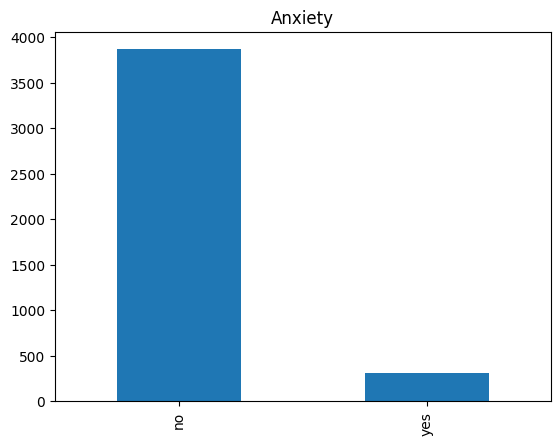

In [39]:
dep.value_counts().plot(kind='bar')
plt.title('Anxiety')
plt.show()

# Feature Selection

In [20]:
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
dep_os = label_encoder.fit_transform(dep_os)

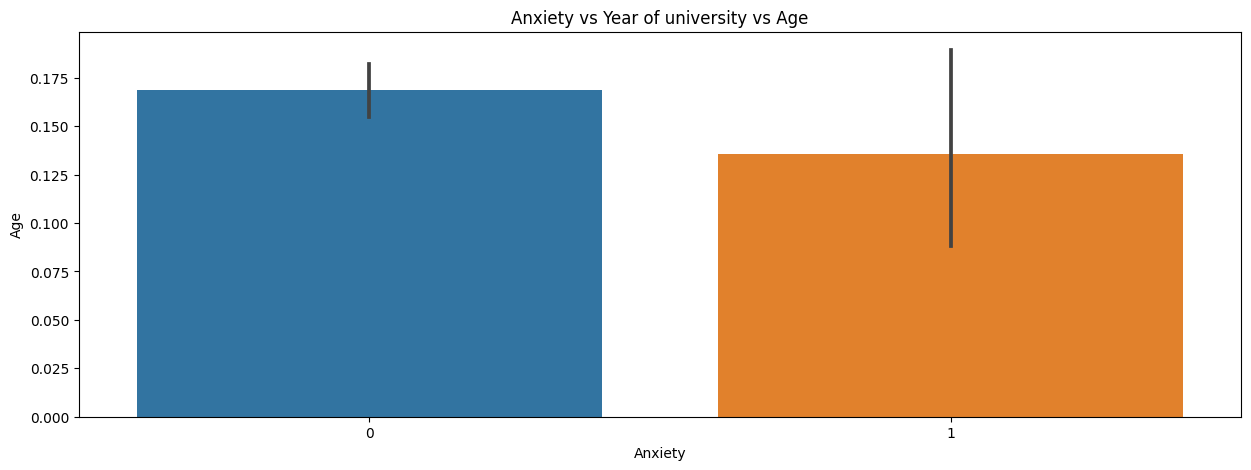

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(y='Year of university',x='Anxiety symptoms',data=selected_features)
plt.title('Anxiety vs Year of university vs Age')
plt.xlabel('Anxiety')
plt.ylabel('Age')
plt.show()

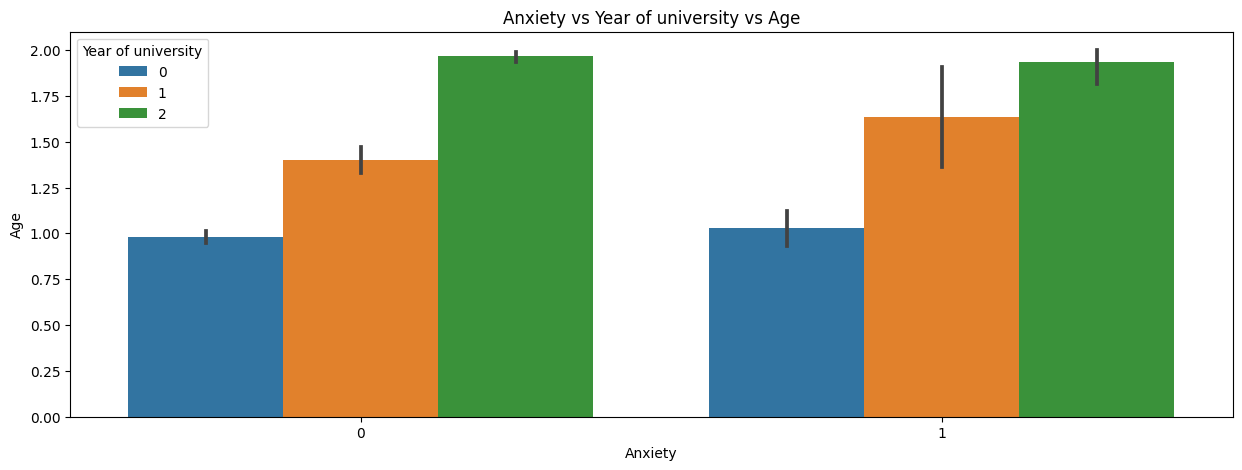

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(y='Age (4 levels)',x='Anxiety symptoms',hue='Year of university',data=selected_features)
plt.title('Anxiety vs Year of university vs Age')
plt.xlabel('Anxiety')
plt.ylabel('Age')
plt.show()

In [ ]:
X.head()

,BMI,MAP,PP,Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,Living with a partner/child,At least one parent unemployed,Siblings,Financial difficulties,Grant,Additional income,Public health insurance,C.M.U.,Irregular rhythm of meals,Unbalanced meals,Eating junk food,On a diet,Irregular rhythm or unbalanced meals,Physical activity(3 levels),Physical activity(2 levels),Distant visual acuity of right eye (score /10),Distant visual acuity of left eye (score /10),Close visual acuity of right eye (score /10),Close visual acuity of left eye (score /10),Decreased in distant visual acuity,Decreased in close visual acuity,Urinalysis (glycosuria),Urinalysis (proteinuria),Urinalysis (hematuria),Urinalysis leukocyturia),Urinalysis (positive nitrite test),Abnormal urinalysis,Control examination needed,Panic attack symptoms,Binge drinking,Satisfied with living conditions,Parental home,Having only one parent,Long commute,Mode of transportation,Private health insurance,Overweight and obesity,Prehypertension or hypertension,Heart rate (bpm),Abnormal heart rate,Vaccination up to date,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Marijuana use,Other recreational drugs
0,0.256726,0.250392,0.339747,0.666667,0.0,1.0,0.0,0.5,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.8,0.818182,0.75,0.75,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.416667,0.0,1.0,0.5,0.5,0.0,0.0,0.0,0.0
1,0.183151,0.166719,0.375000,0.333333,0.0,1.0,0.0,0.5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.8,0.818182,0.75,0.75,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.5,1.0,0.0,0.0,0.297619,0.0,1.0,1.0,1.0,0.5,0.0,0.0,0.0
2,0.224702,0.281313,0.250000,0.666667,0.0,1.0,0.0,0.5,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.8,0.818182,0.75,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.297619,0.0,1.0,0.5,0.5,0.5,0.0,0.0,0.0
3,0.374292,0.258366,0.125000,0.333333,0.0,1.0,0.0,0.5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.8,0.818182,0.75,0.75,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.357143,0.0,1.0,0.5,0.5,0.5,0.0,0.0,0.0
4,0.036531,0.187542,0.250000,0.000000,0.0,1.0,0.0,0.5,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.8,0.818182,0.75,0.75,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.421783,0.0,1.0,0.5,0.5,0.0,0.0,0.0,0.0


In [ ]:
deModel = RandomForestClassifier(random_state=100,n_jobs=-1)

rfecv = RFECV(estimator=Model, step=1, cv=5, scoring='recall')
rfecv.fit(X_dep, dep_os)

print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected features: ", X_dep.columns[rfecv.support_])

Optimal number of features: 49
Selected features:  Index(['BMI', 'MAP', 'PP', 'Age (4 levels)', 'Gender', 'French nationality',
       'Field of study', 'Year of university', 'Learning disabilities',
       'Difficulty memorizing lessons', 'Professional objective',
       'Informed about opportunities', 'At least one parent unemployed',
       'Siblings', 'Financial difficulties', 'Grant', 'Additional income',
       'Public health insurance ', 'C.M.U.', 'Irregular rhythm of meals',
       'Unbalanced meals', 'Eating junk food', 'On a diet',
       'Irregular rhythm or unbalanced meals', 'Physical activity(3 levels)',
       'Physical activity(2 levels)',
       'Distant visual acuity of right eye (score /10)',
       'Distant visual acuity of left eye (score /10)',
       'Decreased in distant visual acuity', 'Urinalysis leukocyturia)',
       'Abnormal urinalysis', 'Control examination needed',
       'Panic attack symptoms', 'Binge drinking',
       'Satisfied with living conditions

In [ ]:
dim_red = X_dep.columns[rfecv.support_].tolist()

In [ ]:
dim_red = dim_red[:20]

In [ ]:
X_dep[dim_red].head(1)

,BMI,MAP,PP,Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,At least one parent unemployed,Siblings,Financial difficulties,Grant,Additional income,Public health insurance,C.M.U.,Irregular rhythm of meals
0,0.256726,0.250392,0.339747,0.666667,0.0,1.0,0.0,0.5,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


# Modeling

## **depression**

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# finding most important features for anxiety
dt = DecisionTreeClassifier()
dt.fit(X_dep,dep_os)

rf = RandomForestClassifier()
rf.fit(X_dep,dep_os)

gb = GradientBoostingClassifier()
gb.fit(X_dep,dep_os)

GradientBoostingClassifier()

In [23]:
# finding important features from trained model
imp_feat_dep = pd.DataFrame(X_dep.columns, columns=['features'])
imp_feat_dep['DT_score'] = dt.feature_importances_
imp_feat_dep['RF_score'] = rf.feature_importances_
imp_feat_dep['GB_score'] = gb.feature_importances_
imp_feat_dep = imp_feat_dep.sort_values(by=['DT_score','RF_score','GB_score'], ascending=False)
imp_feat_dep.head(10)

,features,DT_score,RF_score,GB_score
55,Drinker (3 levels),0.203538,0.083254,0.255761
46,Mode of transportation,0.138102,0.049958,0.080490
22,Eating junk food,0.067606,0.043146,0.073966
0,BMI,0.045787,0.047673,0.002512
9,Difficulty memorizing lessons,0.043711,0.027177,0.049030
1,MAP,0.036048,0.046500,0.005283
2,PP,0.035158,0.056171,0.045639
43,Parental home,0.030800,0.025681,0.023642
3,Age (4 levels),0.029868,0.045677,0.060893
50,Heart rate (bpm),0.028696,0.045693,0.010635


**SELECTING TOP 20 FEATURES**

In [24]:
x_dep_train, x_dep_test, y_dep_train, y_dep_test = train_test_split(X_dep[imp_feat_dep['features'].head(20).values],
                                                                    dep_os,
                                                                    test_size=0.2,
                                                                    random_state=42,
                                                                    shuffle=True)

In [ ]:
# x_anx_train, x_anx_test, y_anx_train, y_anx_test = train_test_split(X_dep[dim_red],
#                                                                     anxiety_os,
#                                                                     test_size=0.2,
#                                                                     random_state=42,
#                                                                     shuffle=True)

# SVM

In [ ]:
from sklearn import svm

svm_classifier = svm.SVC(kernel='poly', C=1.0)
svm_classifier.fit(x_dep_train, y_dep_train)
y_pred = svm_classifier.predict(x_dep_test)
accuracy = accuracy_score(y_dep_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8017771701982228


In [28]:
def performance_eval(clf,X_test):
    y_pred = clf.predict(X_test)
    print(f'Accuracy : {accuracy_score(y_dep_test,y_pred)}\n')
    print('   ------------ Classification Report -----------')
    print(classification_report(y_dep_test,y_pred))
    print('   ------------ Confusion Matrix -------------- ')
    sns.set(rc={'figure.figsize':(5,2)})
    sns.heatmap(confusion_matrix(y_dep_test,y_pred),annot = True,fmt = 'd')

In [ ]:
# clf_lr = LogisticRegression()
# clf_lr.fit(X_train, y_train)
# performance_eval(clf_lr,X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

Accuracy : 0.8017771701982228

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       731
           1       0.84      0.75      0.79       732

    accuracy                           0.80      1463
   macro avg       0.81      0.80      0.80      1463
weighted avg       0.81      0.80      0.80      1463

   ------------ Confusion Matrix -------------- 


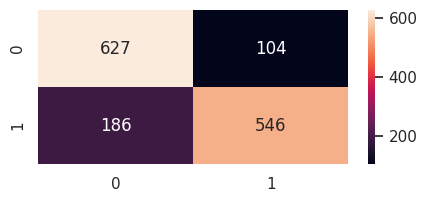

In [ ]:
from sklearn import svm

svm_classifier = svm.SVC(kernel='poly', C=1.0)
svm_classifier.fit(x_dep_train, y_dep_train)
y_pred = svm_classifier.predict(x_dep_test)
accuracy = accuracy_score(y_dep_test, y_pred)
# print("Accuracy:", accuracy)
performance_eval(svm_classifier,x_dep_test)

# NN

In [ ]:
x_dep_train, x_dep_test, y_dep_train, y_dep_test = train_test_split(X_dep[imp_feat_dep['features'].head(20).values],
                                                                    dep_os,
                                                                    test_size=0.2,
                                                                    random_state=42,
                                                                    shuffle=True)
x_dep_train, x_valid, y_dep_train, y_valid = train_test_split(x_dep_train, y_dep_train, test_size=0.1, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(x_dep_train.shape[1],)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_dep_train, y_dep_train, validation_data=(x_valid, y_valid), callbacks=[early_stopping], epochs=100)

Epoch 1/100
165/165 [==============================] - 7s 5ms/step - loss: 0.6713 - accuracy: 0.5861 - val_loss: 0.6602 - val_accuracy: 0.6051
Epoch 2/100
165/165 [==============================] - 1s 3ms/step - loss: 0.6363 - accuracy: 0.6423 - val_loss: 0.6275 - val_accuracy: 0.6496
Epoch 3/100
165/165 [==============================] - 1s 4ms/step - loss: 0.6153 - accuracy: 0.6643 - val_loss: 0.6077 - val_accuracy: 0.6889
Epoch 4/100
165/165 [==============================] - 1s 5ms/step - loss: 0.5952 - accuracy: 0.6896 - val_loss: 0.5976 - val_accuracy: 0.6940
Epoch 5/100
165/165 [==============================] - 1s 5ms/step - loss: 0.5785 - accuracy: 0.7019 - val_loss: 0.5951 - val_accuracy: 0.6940
Epoch 6/100
165/165 [==============================] - 1s 5ms/step - loss: 0.5621 - accuracy: 0.7139 - val_loss: 0.5634 - val_accuracy: 0.7179
Epoch 7/100
165/165 [==============================] - 1s 6ms/step - loss: 0.5516 - accuracy: 0.7160 - val_loss: 0.5512 - val_accuracy: 0.7590

In [ ]:
loss, accuracy = model.evaluate(x_dep_test, y_dep_test)
print("Accuracy:", accuracy)
y_pred = model.predict(x_dep_test)

46/46 [==============================] - 0s 6ms/step - loss: 0.3810 - accuracy: 0.8469
Accuracy: 0.8468899726867676
46/46 [==============================] - 0s 3ms/step


# Ensemble

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
# Train decision tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_dep_train, y_dep_train)

# Train random forest model
random_forest = RandomForestClassifier(n_estimators = 500)
random_forest.fit(x_dep_train, y_dep_train)

# Train XGBoost model
xgboost = XGBClassifier()
xgboost.fit(x_dep_train, y_dep_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Generate predictions from individual models
dt_predictions = decision_tree.predict(x_dep_test)
rf_predictions = random_forest.predict(x_dep_test)
xgb_predictions = xgboost.predict(x_dep_test)

In [ ]:
ensemble_predictions = (dt_predictions + rf_predictions + xgb_predictions) / 3
ensemble_predictions = np.round(ensemble_predictions).astype(int)

In [ ]:
ensemble_accuracy = accuracy_score(y_dep_test, ensemble_predictions)
print("Ensemble Model Accuracy:", ensemble_accuracy)

Ensemble Model Accuracy: 0.9261790840738209


Ensemble model accuracy: 92.62%
Ensemble model AUC-ROC score: 92.62%
Confusion matrix for the ensemble model:


<Axes: >

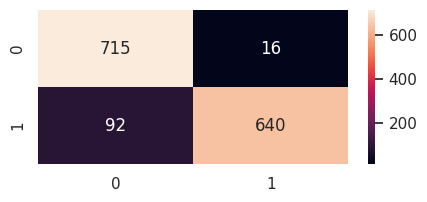

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Calculate the accuracy of the ensemble model
ensemble_acc = accuracy_score(y_dep_test, ensemble_predictions)

# Calculate the AUC-ROC score of the ensemble model
ensemble_auc_roc = roc_auc_score(y_dep_test, ensemble_predictions)

print("Ensemble model accuracy: {:.2f}%".format(ensemble_acc*100))
print("Ensemble model AUC-ROC score: {:.2f}%".format(ensemble_auc_roc*100))

from sklearn.metrics import confusion_matrix

# # Get the confusion matrix for the ensemble model
# ensemble_cm = confusion_matrix(y_dep_test, ensemble_predictions)

# Print the confusion matrix
print("Confusion matrix for the ensemble model:")
sns.heatmap(confusion_matrix(y_dep_test, ensemble_predictions),annot = True,fmt = 'd')



rf Accuracy: 0.9302802460697197


<Axes: >

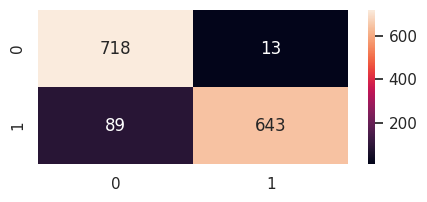

In [ ]:
from sklearn.metrics import confusion_matrix
rf_predictions = random_forest.predict(x_dep_test)
accuracy = accuracy_score(y_dep_test, rf_predictions)
print("rf Accuracy:", accuracy)
sns.heatmap(confusion_matrix(y_dep_test,rf_predictions),annot = True,fmt = 'd')


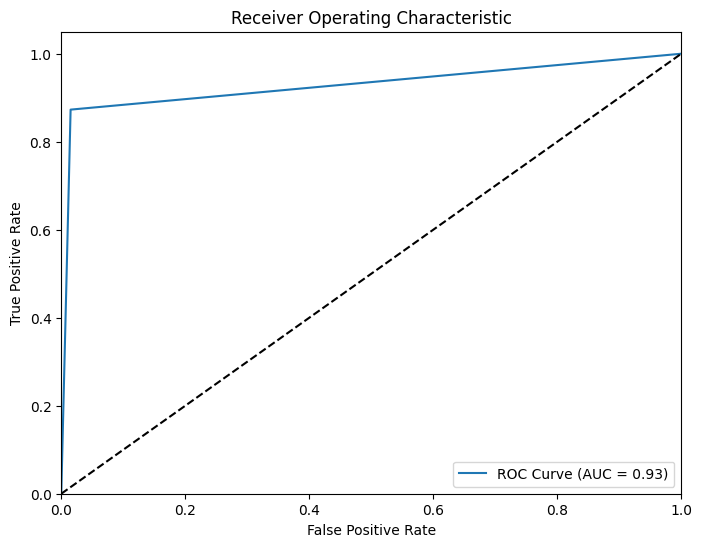

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


y_pred = ensemble_predictions # Obtain predicted probabilities or class labels
y_true = y_dep_test  # True labels of the test set

fpr, tpr, thresholds = roc_curve(y_true, y_pred)  # Compute the false positive rate, true positive rate, and thresholds
auc = roc_auc_score(y_true, y_pred)  # Calculate the area under the ROC curve


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
roc_accuracy = roc_auc_score(y_true, y_pred)
print(roc_accuracy)
print(ensemble_accuracy)

0.928951470027584
0.9289131920710868


# LR

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_dep_train, y_dep_train) 

LogisticRegression()

In [ ]:
y_pred = model.predict(x_dep_test)  

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_dep_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6124401913875598


Accuracy: 0.6097060833902939
Accuracy : 0.6097060833902939

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       731
           1       0.62      0.56      0.59       732

    accuracy                           0.61      1463
   macro avg       0.61      0.61      0.61      1463
weighted avg       0.61      0.61      0.61      1463

   ------------ Confusion Matrix -------------- 


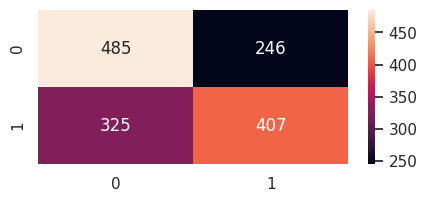

In [ ]:
y_pred = model.predict(x_dep_test)  

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_dep_test, y_pred)
print("Accuracy:", accuracy)

performance_eval(model,x_dep_test)

In [ ]:
def performance_eval(clf,X_test):
    y_pred = clf.predict(X_test)
    print(f'Accuracy : {accuracy_score(y_dep_test,y_pred)}\n')
    print('   ------------ Classification Report -----------')
    print(classification_report(y_dep_test,y_pred))
    print('   ------------ Confusion Matrix -------------- ')
    sns.set(rc={'figure.figsize':(5,2)})
    sns.heatmap(confusion_matrix(y_dep_test,y_pred),annot = True,fmt = 'd')


from sklearn import svm

svm_classifier = svm.SVC(kernel='poly', C=1.0)
svm_classifier.fit(x_dep_train, y_dep_train)
y_pred = svm_classifier.predict(x_dep_test)
accuracy = accuracy_score(y_dep_test, y_pred)
# print("Accuracy:", accuracy)
performance_eval(svm_classifier,x_dep_test)

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# # Load dataset
# df = pd.read_csv('your_dataset.csv')

# # Split dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(df.drop('Depressive symptoms', axis=1), df['Depressive symptoms'], test_size=0.3, random_state=42)

# Define models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
xgboost = xgb.XGBClassifier(random_state=42)

# Fit models on the training data
decision_tree.fit(x_dep_train, y_dep_train)
random_forest.fit(x_dep_train, y_dep_train)
xgboost.fit(x_dep_train, y_dep_train)

# Predict on the test data
dt_pred = decision_tree.predict(x_dep_test)
rf_pred = random_forest.predict(x_dep_test)
xgb_pred = xgboost.predict(x_dep_test)

# Create an ensemble by taking the majority vote of the three models
ensemble_pred = np.round((dt_pred + rf_pred + xgb_pred)/3)

# Calculate the accuracy of the ensemble model
ensemble_acc = accuracy_score(y_dep_test, ensemble_pred)

print("Ensemble model accuracy: {:.2f}%".format(ensemble_acc*100))


Ensemble model accuracy: 93.23%


# XGBoost

In [26]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Objective function for binary classification
    n_estimators=100,  # Number of boosting rounds (trees)
    max_depth=3,  # Maximum depth of each tree
    learning_rate=0.1,  # Learning rate (shrinkage) to prevent overfitting
    random_state=42  # Random state for reproducibility
)

xgb_model.fit(x_dep_train, y_dep_train)

y_pred = xgb_model.predict(x_dep_test)

accuracy = accuracy_score(y_dep_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9207108680792891


Accuracy : 0.9207108680792891

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       731
           1       0.99      0.85      0.91       732

    accuracy                           0.92      1463
   macro avg       0.93      0.92      0.92      1463
weighted avg       0.93      0.92      0.92      1463

   ------------ Confusion Matrix -------------- 


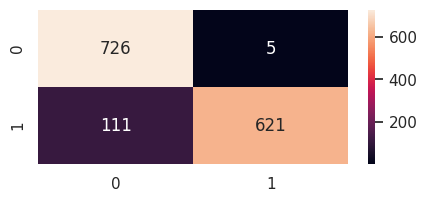

In [31]:
performance_eval(xgb_model,x_dep_test)

# Ensemble 2

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [33]:
base_estimator = RandomForestClassifier(n_estimators=10, random_state=42)

# Initialize the AdaBoost classifier with the base estimator
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Train the AdaBoost model
adaboost_model.fit(x_dep_train, y_dep_train)

# Make predictions on the test set
y_pred = adaboost_model.predict(x_dep_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_dep_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9419002050580998


Accuracy : 0.9419002050580998

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       731
           1       0.97      0.91      0.94       732

    accuracy                           0.94      1463
   macro avg       0.94      0.94      0.94      1463
weighted avg       0.94      0.94      0.94      1463

   ------------ Confusion Matrix -------------- 


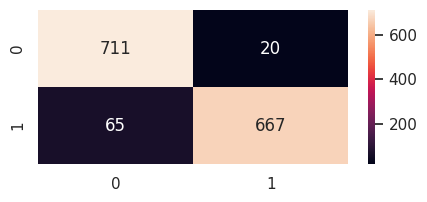

In [34]:
performance_eval(adaboost_model,x_dep_test)

In [ ]:
# Calculate F1 score
f1 = f1_score(y_anx_test, y_pred)
print("F1 score:", f1)

# Calculate precision
precision = precision_score(y_anx_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_anx_test, y_pred)
print("Recall:", recall)

# Calculate ROC AUC score
# Convert predicted probabilities to binary predictions
y_pred = np.round(y_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_anx_test, y_pred_prob)

# Calculate ROC accuracy
roc_accuracy = (y_anx_test == y_pred).mean()

print("ROC AUC score:", roc_auc)
print("ROC accuracy:", roc_accuracy)

roc_auc = roc_auc_score(y_anx_test, y_pred_prob)  # y_pred_prob is the predicted probability for positive class
print("ROC AUC score:", roc_auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_anx_test, y_pred_prob)  # y_pred_prob is the predicted probability for positive class

F1 score: 0.958994708994709
Precision: 0.9823848238482384
Recall: 0.9366925064599483
ROC AUC score: 0.9264485159668528
ROC accuracy: 0.9599224305106658
ROC AUC score: 0.9264485159668528


In [ ]:
# Calculate F1 score
f1 = f1_score(y_dep_test, y_pred)
print("F1 score:", f1)

# Calculate precision
precision = precision_score(y_dep_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_dep_test, y_pred)
print("Recall:", recall)

# Calculate ROC AUC score
# Convert predicted probabilities to binary predictions
y_pred = np.round(y_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_dep_test, y_pred_prob)

# Calculate ROC accuracy
roc_accuracy = (y_dep_test == y_pred).mean()

print("ROC AUC score:", roc_auc)
print("ROC accuracy:", roc_accuracy)

roc_auc = roc_auc_score(y_anx_test, y_pred_prob)  # y_pred_prob is the predicted probability for positive class
print("ROC AUC score:", roc_auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_anx_test, y_pred_prob)  # y_pred_prob is the predicted probability for positive class

F1 score: 0.941096817874069
Precision: 0.9886201991465149
Recall: 0.8979328165374677
ROC AUC score: 0.9264485159668528
ROC accuracy: 0.9437621202327084
ROC AUC score: 0.9264485159668528
